In [1]:

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

from   sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
df_completo = pd.read_csv("..\\Dados\\data_bank_normal.csv", sep=";")
df_completo.head()

,Adjusted_savings:_energy_depletion_(%_of_GNI),Age_dependency_ratio_(%_of_working-age_population),"Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)",GDP_deflator_(base_year_varies_by_country),GDP_per_capita_(constant_2010_US$),GDP_per_capita_(current_US$),General_government_final_consumption_expenditure_(%_of_GDP),GNI_(current_US$),Gross_fixed_capital_formation_(%_of_GDP),"Inflation,_GDP_deflator_(annual_%)",Premiums_per_capita_(USD)_-_Total
0,0.004155,0.592557,0.614531,0.023328,0.114660,0.050772,0.354158,0.001432,0.858312,0.019362,0.006829
1,0.572785,1.000000,0.220651,0.010880,0.103899,0.020890,0.838390,0.002594,0.712583,0.539902,0.004878
2,0.031205,0.618311,0.123592,0.018923,0.363386,0.285552,0.471821,0.091785,0.331346,-0.005563,0.179512
3,0.018935,0.539605,0.129880,0.015490,0.411435,0.125053,0.644702,0.190348,0.430405,0.041755,0.070244
4,0.059290,0.604241,0.225104,0.016671,0.227467,0.096646,0.552144,0.033689,0.359865,0.033091,0.046829


In [3]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Adjusted_savings:_energy_depletion_(%_of_GNI)                380 non-null    float64
 1   Age_dependency_ratio_(%_of_working-age_population)           380 non-null    float64
 2   Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)   380 non-null    float64
 3   GDP_deflator_(base_year_varies_by_country)                   380 non-null    float64
 4   GDP_per_capita_(constant_2010_US$)                           380 non-null    float64
 5   GDP_per_capita_(current_US$)                                 380 non-null    float64
 6   General_government_final_consumption_expenditure_(%_of_GDP)  380 non-null    float64
 7   GNI_(current_US$)                                            380 non-null    flo

In [4]:
df_completo.isnull().any()

Adjusted_savings:_energy_depletion_(%_of_GNI)                  False
Age_dependency_ratio_(%_of_working-age_population)             False
Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)     False
GDP_deflator_(base_year_varies_by_country)                     False
GDP_per_capita_(constant_2010_US$)                             False
GDP_per_capita_(current_US$)                                   False
General_government_final_consumption_expenditure_(%_of_GDP)    False
GNI_(current_US$)                                              False
Gross_fixed_capital_formation_(%_of_GDP)                       False
Inflation,_GDP_deflator_(annual_%)                             False
Premiums_per_capita_(USD)_-_Total                              False
dtype: bool

In [5]:

evaluation = pd.DataFrame(
    {
        "Model": [],
        "Details": [],
        "Root Mean Squared Error (RMSE)": [],
        "R-squared (training)": [],
        "Adjusted R-squared (training)": [],
        "R-squared (test)": [],
        "Adjusted R-squared (test)": [],
        "5-Fold Cross Validation": []
    }
)

In [6]:
def adjusted_r2(r2, n, k):
    return r2 - (n - 1) * (1 - r2) / (n - k - 1)

In [14]:
train_data, test_data = train_test_split(df_completo, train_size=0.7, random_state=4)

independent_var = [ "Adjusted_savings:_energy_depletion_(%_of_GNI)",
                    "Age_dependency_ratio_(%_of_working-age_population)",
                    "Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)",
                    "GDP_deflator_(base_year_varies_by_country)",
                    "GDP_per_capita_(constant_2010_US$)",
                    "GDP_per_capita_(current_US$)",
                    "General_government_final_consumption_expenditure_(%_of_GDP)",
                    #"GNI_(current_US$)",
                    "Gross_fixed_capital_formation_(%_of_GDP)",
                    "Inflation,_GDP_deflator_(annual_%)"
                    ]
lin_reg = LinearRegression()
lin_reg.fit(train_data[independent_var], train_data["Premiums_per_capita_(USD)_-_Total"])

print(f"Intercept: {lin_reg.intercept_}")
print(f"Coefficients: {lin_reg.coef_}")

Intercept: 0.28063450205648516
Coefficients: [ 1.90987812e-12 -2.35488040e-01 -3.98370254e-01 -4.86469589e-02
 -6.71328785e-01  4.96484488e-01  5.37275591e-01 -8.45889854e-02
 -2.04698781e-01]


In [15]:
pred = lin_reg.predict(test_data[independent_var])

In [16]:
rmse = metrics.mean_squared_error(test_data["Premiums_per_capita_(USD)_-_Total"], pred)
r2_train = lin_reg.score(train_data[independent_var], train_data["Premiums_per_capita_(USD)_-_Total"])
ar2_train = adjusted_r2(
    r2_train,
    train_data.shape[0],
    len(independent_var)
)

r2_test = lin_reg.score(test_data[independent_var], test_data["Premiums_per_capita_(USD)_-_Total"])
ar2_test = adjusted_r2(
    r2_test,
    test_data.shape[0],
    len(independent_var)
)

cross_val = cross_val_score(lin_reg, df_completo[independent_var], df_completo["Premiums_per_capita_(USD)_-_Total"], cv=5).mean()

r = evaluation.shape[0]
evaluation.loc[r] = ["Multiple Linear Regression-1", "Selected features", rmse, r2_train, ar2_train, r2_test, ar2_test, cross_val]
evaluation.sort_values(by="5-Fold Cross Validation", ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Linear Regression-1,Selected features,0.017731,0.414768,-0.191039,0.356054,-0.343619,-6.389131e+19
0,Multiple Linear Regression-1,Selected features,0.017729,0.414789,-0.193371,0.356150,-0.350210,-6.467934e+19


In [17]:

# Retorna um array de zeros com o mesmo shape e tipo do array dado
mask = np.zeros_like(df_completo.corr(), dtype=bool)

# Retorna os índices apenas do triângulo superior do array
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

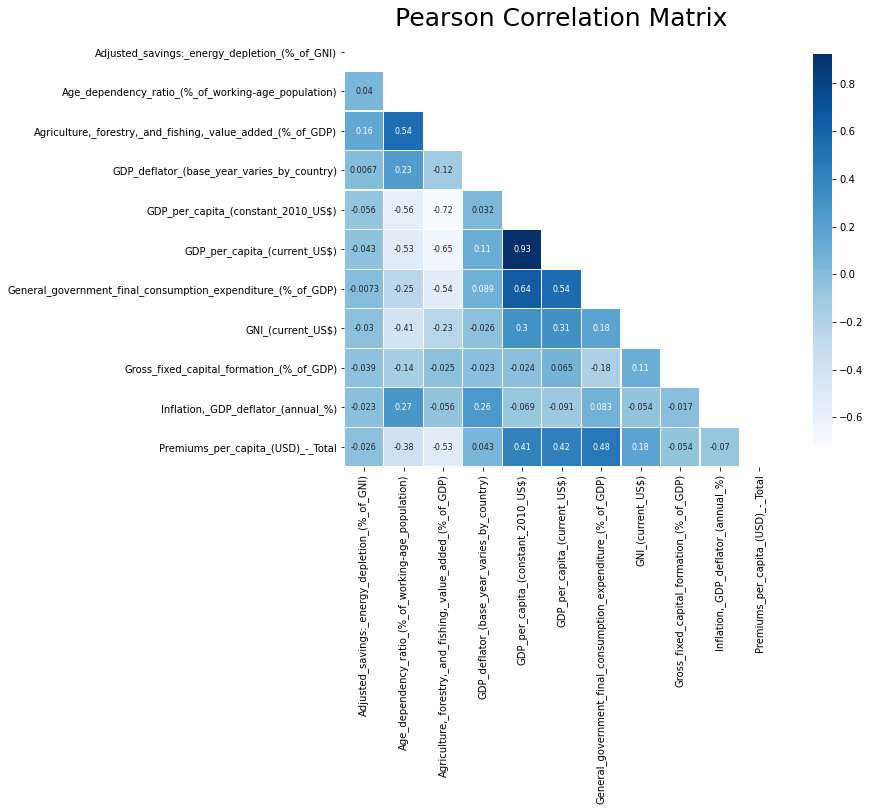

In [18]:
plt.subplots(figsize=(12, 8))
plt.title("Pearson Correlation Matrix", fontsize=25)

sns.heatmap(
    df_completo.corr(),
    linewidths=0.25,
    square=True,
    cmap="Blues",
    linecolor="w",
    annot=True,
    annot_kws={"size": 8},
    mask=mask,
    cbar_kws={"shrink": 0.9}
)

In [27]:
X = np.column_stack((
df_completo["Adjusted_savings:_energy_depletion_(%_of_GNI)"],
df_completo["Age_dependency_ratio_(%_of_working-age_population)"],
df_completo["Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)"],
df_completo["GDP_deflator_(base_year_varies_by_country)"],
df_completo["GDP_per_capita_(constant_2010_US$)"],
df_completo["GDP_per_capita_(current_US$)"],
df_completo["General_government_final_consumption_expenditure_(%_of_GDP)"],
df_completo["GNI_(current_US$)"],
df_completo["Gross_fixed_capital_formation_(%_of_GDP)"],
df_completo["Inflation,_GDP_deflator_(annual_%)"]          
                                        
                     ))
y = df_completo["Premiums_per_capita_(USD)_-_Total"]


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                                    OLS Regression Results                                   
Dep. Variable:     Premiums_per_capita_(USD)_-_Total   R-squared:                       0.403
Model:                                           OLS   Adj. R-squared:                  0.392
Method:                                Least Squares   F-statistic:                     35.90
Date:                               Wed, 03 Nov 2021   Prob (F-statistic):           3.13e-38
Time:                                       21:05:21   Log-Likelihood:                 211.84
No. Observations:                                380   AIC:                            -407.7
Df Residuals:                                    372   BIC:                            -376.1
Df Model:                                          7                                         
Covariance Type:                           nonrobust                                         
                 coef    std err          t      P>|t|      

In [13]:
df_completo['Human_capital'], df_completo['Monetary_policy_space'], df_completo['Fiscal_space'], 

df_completo['Financial_Market_development'],

"Fiscal_space", "Monetary_policy_space", "Human_capital", 

KeyError: 'Human_capital'

In [ ]:
cross_val_score(lin_reg, df_completo[independent_var], df_completo["Insurance_penetration"], cv=5)

In [ ]:
#df_completo["Access_to_electricity_(%_of_population)"],
#df_completo["Adjusted_savings:_education_expenditure_(%_of_GNI)"],
df_completo["Adjusted_savings:_energy_depletion_(%_of_GNI)"],
df_completo["Age_dependency_ratio_(%_of_working-age_population)"],
df_completo["Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)"],
df_completo["GDP_deflator_(base_year_varies_by_country)"],
#df_completo["GDP_growth_(annual_%)"],
df_completo["GDP_per_capita_(constant_2010_US$)"],
df_completo["GDP_per_capita_(current_US$)"],
df_completo["General_government_final_consumption_expenditure_(%_of_GDP)"],
df_completo["GNI_(current_US$)"],
#df_completo["Gross_capital_formation_(%_of_GDP)"],
df_completo["Gross_fixed_capital_formation_(%_of_GDP)"],
df_completo["Inflation,_GDP_deflator_(annual_%)"] 

In [ ]:
#"Access_to_electricity_(%_of_population)",
#"Adjusted_savings:_education_expenditure_(%_of_GNI)",
"Adjusted_savings:_energy_depletion_(%_of_GNI)",
"Age_dependency_ratio_(%_of_working-age_population)",
"Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)",
"GDP_deflator_(base_year_varies_by_country)",
#"GDP_growth_(annual_%)",
"GDP_per_capita_(constant_2010_US$)",
"GDP_per_capita_(current_US$)",
"General_government_final_consumption_expenditure_(%_of_GDP)",
"GNI_(current_US$)",
#"Gross_capital_formation_(%_of_GDP)",
"Gross_fixed_capital_formation_(%_of_GDP)",
"Inflation,_GDP_deflator_(annual_%)"